In [1]:
#
#  File:
#    clmdiv1.py
#
#  Synopsis:
#    Draws U.S. geographic climate divisions as polygonal areas.
#
#  Categories:
#    maps only
#    polygons
#
#  Author:
#    Fred Clare (based on an NCL script of Mark Stevens, CGD, NCAR)
#  
#  Date of initial publication:
#    September, 2004
#
#  Description:
#    This example reads polygon data defining the U.S. geographic
#    climate divisions and produces a visualization of those divisions
#    colored randomly. 
#
#  Effects illustrated:
#      o  Using a Lambert conformal map projection.
#      o  How to select a map database resolution.
#      o  How to color only specified map areas.
#      o  How to draw color-filled polygons.
#      o  Usage of the the Python "random" module.
# 
#  Output:
#     A single visualization is produced showing the
#     U.S. climate divisions.
#

#
#  Import numpy and random.
#
from __future__ import print_function
import numpy
import random
import os

#
#  Import Nio for reading netCDF files.
#
import Nio

#
#  Import Ngl support functions.
#
import Ngl

#
#  Open the netCDF file containing the climate divisions polygons.
#
dirc = Ngl.pynglpath("data")
ncdf = Nio.open_file(os.path.join(dirc,"cdf","climdiv_polygons.nc"))

#
#  State names for the contiguous U.S. states.
#
statenames = ["AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL", \
              "IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT", \
              "NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA", \
              "RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]

# 
#  Climate divisions in each state.
#
ncds = [8,9,7,7,5,3,2,6,9,9,10,9,9,9,4,9,3,8,3,10,9,6,10,7, \
        8,9,8,2,3,8,4,10,10,9,9,10,1,7,9,4,10,7,7,3,10,9,6,10]

#
#  Number of polygons to draw.
#
npoly = len(ncds)

#
#  Define a color map and open a workstation.
#
cmap = numpy.array([[1.00,1.00,1.00],[0.00,0.00,0.00],[1.00,0.00,0.00],\
                      [0.00,1.00,0.00],[0.00,0.00,1.00],[1.00,1.00,0.00],\
                      [0.00,1.00,1.00],[1.00,0.00,1.00],[0.70,0.30,0.30],\
                      [0.50,1.00,1.00],[0.80,0.80,0.20],[1.00,1.00,0.50],\
                      [0.50,0.00,0.80],[1.00,0.50,0.00],[0.30,0.30,0.80],\
                      [0.50,1.00,0.00],[0.40,0.00,0.40],[0.50,1.00,0.50],\
                      [0.80,0.20,0.80],[0.00,0.60,0.00],[0.50,0.50,1.00],\
                      [1.00,0.00,0.50],[0.50,0.50,0.00],[0.00,0.50,0.50],\
                      [1.00,0.50,0.50],[0.00,1.00,0.50],[0.80,0.80,0.80],\
                      [0.20,0.80,0.00],[0.55,0.55,0.00],[0.00,0.70,0.00],\
                      [0.62,0.62,0.00],[0.25,0.25,0.25]],
                      'f')
wks_type = "png"
wks = Ngl.open_wks (wks_type,"clmdiv1")

#
#  Create the plot.
#

#
#  Map resources.
#
res = Ngl.Resources()
res.mpLambertParallel1F = 33.0         # two parallels
res.mpLambertParallel2F = 45.0
res.mpLambertMeridianF  = -95.0        # central meridian

res.mpLimitMode         = "LatLon"     # limit map via lat/lon
res.mpMinLatF           = 24.0         # map area
res.mpMaxLatF           = 50.0         # latitudes
res.mpMinLonF           = -125.0       # and
res.mpMaxLonF           = -65.0        # longitudes

res.mpDataBaseVersion   = "Ncarg4_1"   # change database
res.mpFillOn            = True         # fill continents
res.mpPerimOn           = False        # no box around map

res.mpAreaMaskingOn        = True                 # draw only parts of map
res.mpFillAreaSpecifiers   = ["Water","Land"]     # what parts to fill
res.mpSpecifiedFillColors  = ["white","white"]   # fill with white
res.mpOutlineBoundarySets  = "USStates"           # what outlines to use
res.mpMaskAreaSpecifiers   = ["Conterminous US"]  # don't fill here
res.mpGridAndLimbOn        = False                # no lat/lon lines

#
#  Increase the viewport size (make the map bigger).
# 
res.vpWidthF  = 0.93
res.vpHeightF = 0.93
res.vpXF      = 0.05
res.vpYF      = 0.99

res.nglDraw  = False       # don't draw the plots now
res.nglFrame = False       # or advance the frame

res.mpProjection = "LambertConformal"
plot = Ngl.map(wks,res) # create the map plot

#
#  Polygon resources.
#
res_poly             = Ngl.Resources()
res_poly.gsEdgesOn   = True       # draw border around polygons.
res_poly.gsEdgeColor = "black"

#
# Prepare to draw the polygons.
#
random.seed(10)   # set a seed for the random number generator

#
#  Get the polygon data and fill polygons with random colors in 
#  the range of our color table (2-31).
#
for st in range(npoly):
    for cd in range(ncds[st]):
        rand_num = int(29.*random.random()+2.)
        if (st == 42 and cd == 0):          # save value
            va1_rn = rand_num                 # VA clim div 1
        if (st == 42 and cd == 6):          # use value for
            res_poly.gsFillColor = cmap[va1_rn,:]     # VA clim div 1
        else:
            res_poly.gsFillColor = cmap[rand_num,:]
    varstr = "{}_CD{}".format(statenames[st], cd + 1)
    x = ncdf.variables[varstr].lon
    y = ncdf.variables[varstr].lat
    Ngl.polygon (wks,plot,x,y,res_poly)
    del(varstr)
    del(x)
    del(y)

#
# Add a title.
#
res_txt               = Ngl.Resources()         # text resources
res_txt.txFontHeightF = 0.03                    # select font size
res_txt.txFont        = "helvetica-bold"        # font
Ngl.text_ndc (wks, "Climate Division Polygons", 0.5, 0.78, res_txt)

Ngl.frame(wks)

Ngl.end()

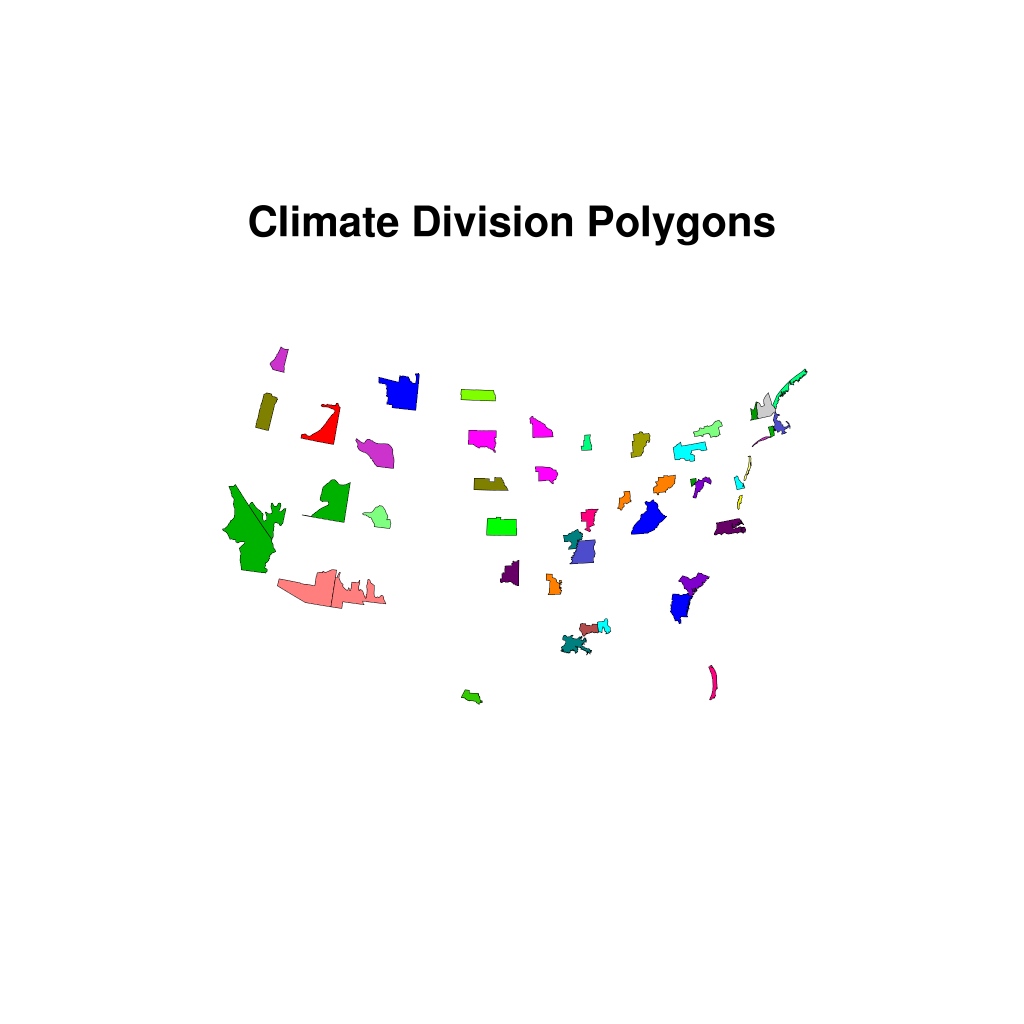